In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "data/"
filename = "marketing_campaign.csv"
file_path = os.path.join(path, filename)

data_df = pd.read_csv(file_path, sep='\t')
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [52]:
# Taille des données
data_df.columns



Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [42]:
data_df.isna().sum(axis=0) # Pas de valeurs manquantes

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [43]:
data_df[data_df['Income'] == np.nan]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


https://cedric.cnam.fr/vertigo/Cours/ml/tpDonneesManquantes.html

In [44]:
num_df = data_df.select_dtypes(include='number')
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3) # SimpleImputer(strategy='mean')
imputed_num_df = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns)


In [45]:
scaler = RobustScaler()
non_num_df = data_df.select_dtypes(exclude='number')
data_scaled = scaler.fit_transform(imputed_num_df)

data_scaled_df = pd.DataFrame(data_scaled, columns=num_df.columns, index=num_df.index)
final_df = pd.concat([data_scaled_df, non_num_df], axis=1)


In [ ]:
# Evaluation des outliers par boxplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 3  # Adjust the number of columns as needed
n_rows = (len(data_scaled_df.columns) // n_cols) + (len(data_scaled_df.columns) % n_cols > 0)  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(data_scaled_df.columns):
    sns.boxplot(ax=axes[i], data=data_scaled_df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')  # Optional: hide xlabel for clarity
    axes[i].set_ylabel('')  # Optional: hide ylabel for clarity

# Hide any unused subplots (if the number of columns is not a perfect multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

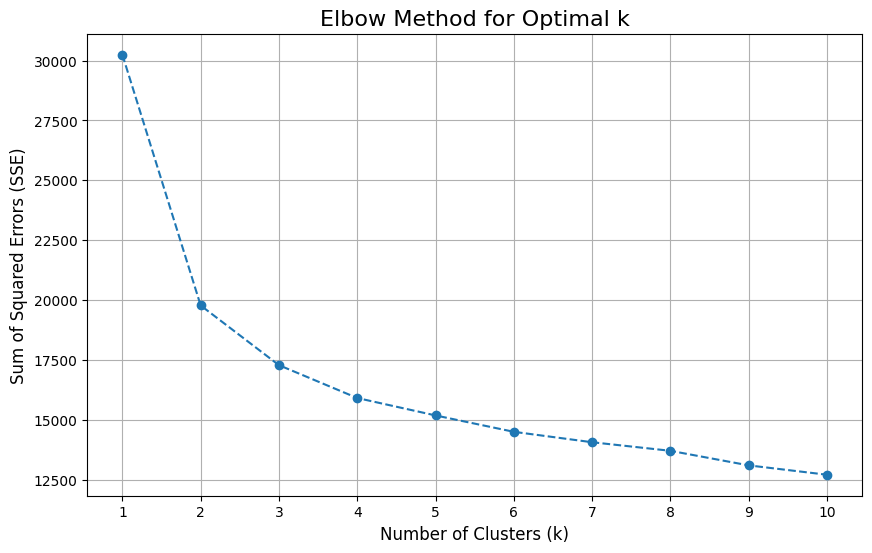

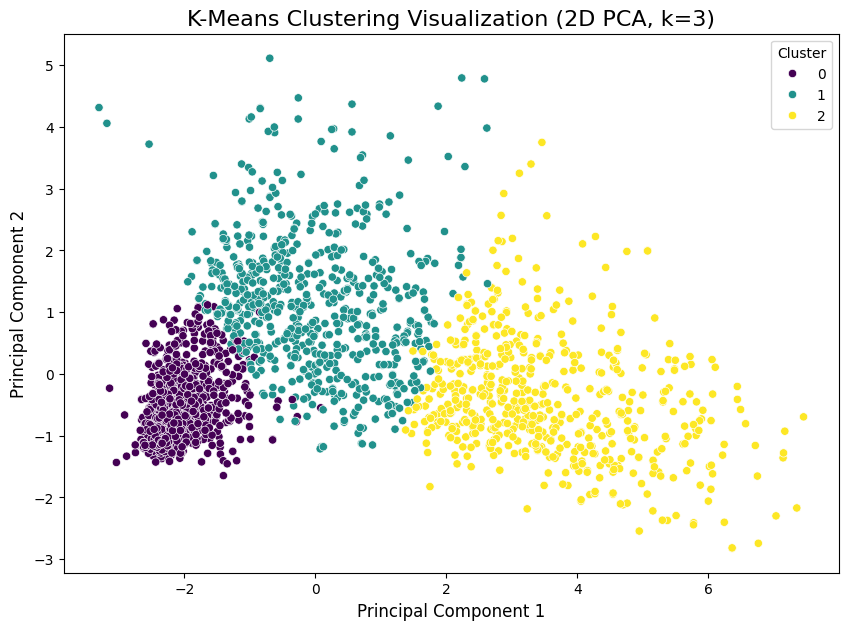

In [51]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Copy of the scaled data
data_scaled_df_k = data_scaled_df.copy()

# Step 1: Determine the optimal number of clusters using the elbow method
sse = []  # Sum of Squared Errors
k_range = range(1, 11)  # Test k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(data_scaled_df_k)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Step 2: Apply K-Means++ with the optimal number of clusters
optimal_k = 3  # Replace with the elbow point identified from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
data_scaled_df_k['Cluster'] = kmeans.fit_predict(data_scaled_df_k)

# Add clusters to the final dataframe
final_df['Cluster'] = data_scaled_df_k['Cluster']

# Step 3: PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled_df_k.drop(columns='Cluster'))
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = data_scaled_df_k['Cluster']

# Step 4: Visualization of the Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title(f'K-Means Clustering Visualization (2D PCA, k={optimal_k})', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error (MSE): 9909.0150
R² Score: 0.4426


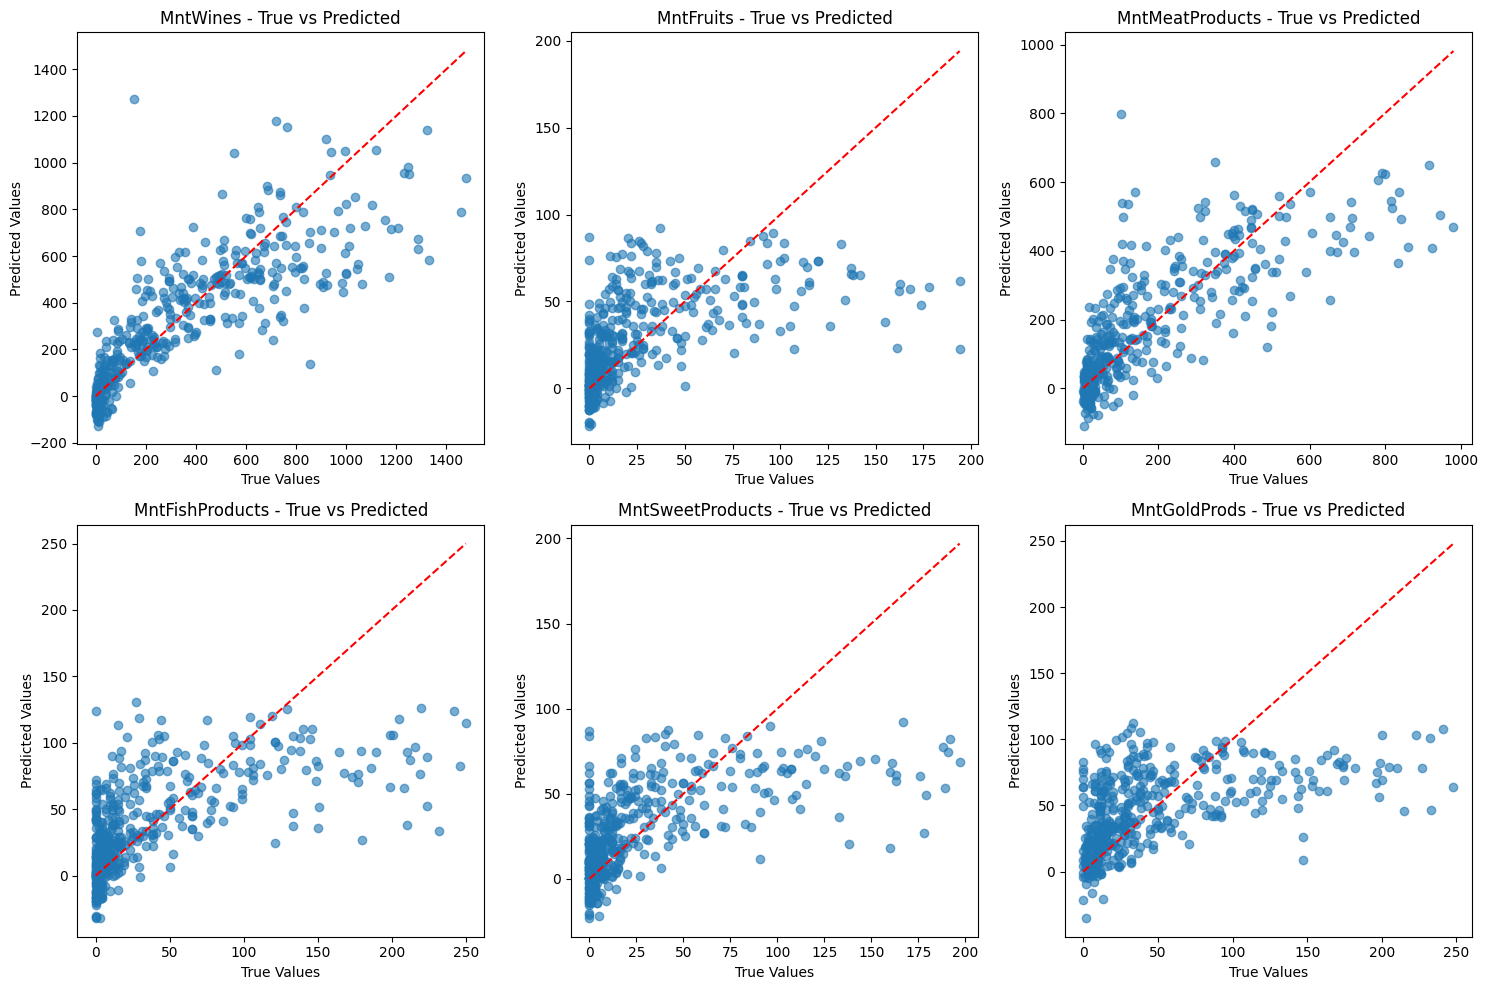

In [59]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Define the target columns
target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Step 2: Preprocessing pipeline

# Define numeric columns (exclude the target variables and non-numeric columns)
numeric_cols = data_df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in target_features]

# Define categorical columns
categorical_cols = data_df.select_dtypes(exclude='number').columns.tolist()

# Create a transformer for numeric columns (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),  # Imputation for missing values
    ('scaler', RobustScaler())  # Robust scaling
])

# Create a transformer for categorical columns (one-hot encode)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine both transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 3: Prepare the data

# Select features (X) and target (y)
X = data_df.drop(columns=target_features)  # Features
y = data_df[target_features]  # Target variables

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a pipeline for the full process (Preprocessing + MLP)
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('mlp', MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42))  # MLP Model
])

# Step 6: Train the MLP model
mlp_pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = mlp_pipeline.predict(X_test)

# Step 8: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

# Step 9: Visualize predictions vs true values for each target feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(target_features):
    ax = axes[i // 3, i % 3]
    ax.scatter(y_test[feature], y_pred[:, i], alpha=0.6)
    ax.set_title(f'{feature} - True vs Predicted')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.plot([y_test[feature].min(), y_test[feature].max()],
            [y_test[feature].min(), y_test[feature].max()], color='red', linestyle='--')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Define the target columns
target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Step 2: Preprocessing pipeline

# Define numeric columns (exclude the target variables and non-numeric columns)
numeric_cols = data_df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in target_features]

# Define categorical columns
categorical_cols = data_df.select_dtypes(exclude='number').columns.tolist()

# Create a transformer for numeric columns (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),  # Imputation for missing values
    ('scaler', RobustScaler())  # Robust scaling
])

# Create a transformer for categorical columns (one-hot encode)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine both transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 3: Prepare the data

# Select features (X) and target (y)
X = data_df.drop(columns=target_features)  # Features
y = data_df[target_features]  # Target variables

# Step 4: Create the full pipeline (Preprocessing + PCA + MLP)
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('pca', PCA(n_components=0.95)),  # Apply PCA to reduce dimensionality (95% variance explained)
    ('mlp', MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42))  # MLP Model
])

# Step 5: Cross-Validation
# We will use cross_val_score to perform cross-validation on the pipeline
cv_scores = cross_val_score(mlp_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert negative MSE to positive MSE
cv_scores = -cv_scores

# Step 6: Print the results of cross-validation
print(f'Cross-Validation Mean Squared Error (MSE) for each fold: {cv_scores}')
print(f'Average MSE across all folds: {cv_scores.mean():.4f}')
print(f'Standard Deviation of MSE across folds: {cv_scores.std():.4f}')

# Step 7: Train the model on the full dataset and evaluate the performance
mlp_pipeline.fit(X, y)

# Make predictions
y_pred = mlp_pipeline.predict(X)

# Evaluate the model's performance on the entire dataset
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error (MSE) on the entire dataset: {mse:.4f}')
print(f'R² Score on the entire dataset: {r2:.4f}')

# Step 8: Visualize predictions vs true values for each target feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(target_features):
    ax = axes[i // 3, i % 3]
    ax.scatter(y[feature], y_pred[:, i], alpha=0.6)
    ax.set_title(f'{feature} - True vs Predicted')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.plot([y[feature].min(), y[feature].max()],
            [y[feature].min(), y[feature].max()], color='red', linestyle='--')

plt.tight_layout()
plt.show()


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
